In [5]:
import numpy as np
import pandas as pd
import matplotlib as lib
import seaborn

In [6]:
data=pd.read_csv('Jamboree_Admission.csv')

#EXPLORATORY DATA ANALYSIS

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
data.shape

(500, 9)

In [9]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
# Categorical Variables - University Ranking,Research

In [12]:
#dropping Row no

In [13]:
data.drop('Serial No.',axis='columns',inplace=True)

In [14]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
data['University Rating'].value_counts(normalize=True)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

In [16]:
data['Research'].value_counts(normalize=True)

1    0.56
0    0.44
Name: Research, dtype: float64

Data is not Imbalaced as both Categories  have fair share

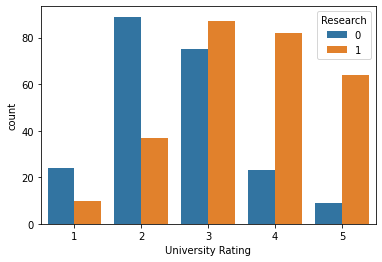

In [17]:
import seaborn as sns
sns.countplot(x='University Rating',data=data,hue='Research')

Most of the students in high rated Universities are having Research experience

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


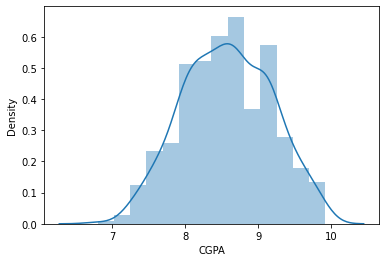

In [18]:
sns.distplot(data['CGPA'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


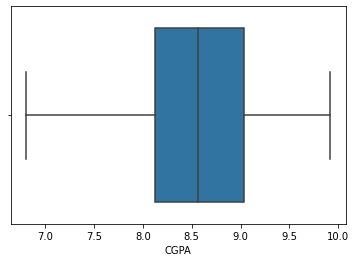

In [19]:
sns.boxplot(data['CGPA'])

CGPA DON'T HAVE OUTLIERS. IT ISN'T SKEWED EITHER.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


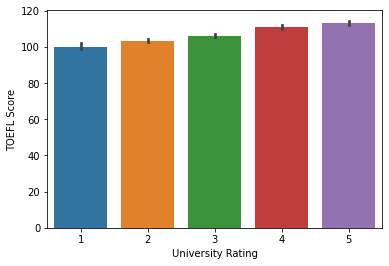

In [20]:
sns.barplot(data['University Rating'] , data['TOEFL Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


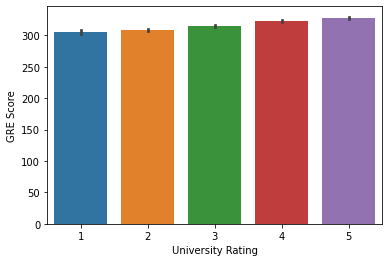

In [21]:
sns.barplot(data['University Rating'] , data['GRE Score'])

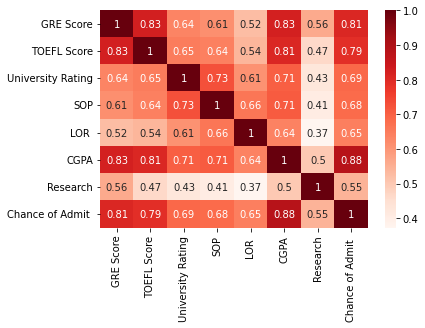

In [22]:
sns.heatmap(data.corr(),cmap='Reds',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


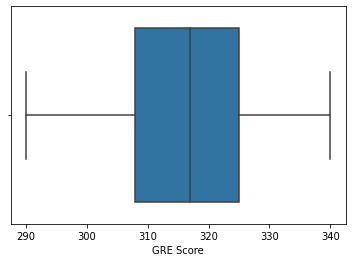

In [23]:
sns.boxplot(data['GRE Score'])

#VIF & Statsmodel Library

In [24]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [26]:
data.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)

In [27]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [29]:
Y=data['Chance of Admit']
X=data.drop("Chance of Admit",axis='columns')
X=sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
X.shape,Y.shape

((500, 8), (500,))

In [31]:
sm_model=sm.OLS(Y,X).fit()

In [32]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          8.21e-180
Time:                        13:41:13   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

Explaining the above Table:-
1. Dependent variable (Dependent Variable)

"Chance of Admit” which is the dependent variable in the data we want to predict

2. Lower part of the Table
==> Null hypothesis: A coefficient equals zero. 
==> Alternate Hypothesis: A coefficient is non-zero.

t-values and P>|t|

The t-column provides the t-statistic values corresponding to each independent variables.
Typically when p-value is less than 0.05, it indicates a strong evidence against null hypothesis which states that the corresponding independent variable has an effect on the dependent variable.

Every variable except "University Ranking' & "SOP" got less than 0.05 as p-value indicating that the data for statistically significant.

#VIF

VIF
Though we see that most of the features are statistically significant,
There might be MultiCollinearity amongst them.
So we will perform a VIF just for a Sanity check

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1511.50
6,CGPA,4.78
1,GRE Score,4.46
2,TOEFL Score,3.90
4,SOP,2.84
3,University Rating,2.62
5,LOR,2.03
7,Research,1.49


Note : Vif values tends to be infinity when there is a perfect correlation between the variables

Any variable with a VIF of 5 or above is considered correlated with other variables.

We don't have any such Variable

But should we only consider those features which has VIF<5 ?
No, We should step-by-step drop the features with the highest VIF and see how the model performs for each case.
Since dropping all of those features will cause loss of high valued information necessary for prediction

# let's drop Non-significant Columns based on VIF & P-Value

In [35]:
data.drop('University Rating',axis='columns',inplace=True)

In [36]:
data.drop('SOP',axis='columns',inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRE Score        500 non-null    int64  
 1   TOEFL Score      500 non-null    int64  
 2   LOR              500 non-null    float64
 3   CGPA             500 non-null    float64
 4   Research         500 non-null    int64  
 5   Chance of Admit  500 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


#Multiple Linear Regression


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRE Score        500 non-null    int64  
 1   TOEFL Score      500 non-null    int64  
 2   LOR              500 non-null    float64
 3   CGPA             500 non-null    float64
 4   Research         500 non-null    int64  
 5   Chance of Admit  500 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [39]:
Y=data['Chance of Admit']
X=data.drop("Chance of Admit",axis='columns')

In [40]:
X.shape

(500, 5)

In [41]:

# ones=np.ones((X.shape[0],1))
# X=np.hstack((ones,X))

In [42]:
X.shape

(500, 5)

In [43]:
X

,GRE Score,TOEFL Score,LOR,CGPA,Research
0,337,118,4.5,9.65,1
1,324,107,4.5,8.87,1
2,316,104,3.5,8.00,1
3,322,110,2.5,8.67,1
4,314,103,3.0,8.21,0
...,...,...,...,...,...
495,332,108,4.0,9.02,1
496,337,117,5.0,9.87,1
497,330,120,5.0,9.56,1
498,312,103,5.0,8.43,0


In [44]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [45]:
def predict(X,weights):
  return np.dot(X,weights)

In [46]:
def error(X,Y,weights):
  Y_hat=predict(X,weights)
  err=np.mean((Y-Y_hat)**2)
  return err

In [47]:
def gradient(X,Y,weights):
  n=X.shape[0]
  Y_hat=predict(X,weights)
  grad=np.dot(X.T,Y-Y_hat)
  grad=(grad*-2)/n
  return grad

In [48]:
def gradient_descent(X,Y,epochs=800,learning_rate=0.1):
  weights=np.zeros((X.shape[1],1))
  error_list=[]

  for i in range(epochs):
    grad=gradient(X,Y,weights)
    e=error(X,Y,weights)
    error_list.append(e)
    weights=weights-learning_rate*grad

  return weights,error_list

In [49]:
X.shape

(500, 5)

In [50]:
Y.shape

(500,)

In [51]:
Y=Y.values.reshape(-1,1)


In [52]:
Y.shape

(500, 1)

Standardisation

In [53]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(X)


We don't standardize Y in linear regression

In [54]:
X


array([[ 1.81923762,  1.77886545,  1.09894429,  1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  1.09894429,  0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441,  0.01730621, -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.63976333,  1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  1.63976333, -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  1.09894429,  0.76721964, -1.12815215]])

In [55]:
weights,error_list=gradient_descent(X,Y,epochs=800)

In [56]:
weights

array([[0.02131721],
       [0.0183328 ],
       [0.01786203],
       [0.07430533],
       [0.01249151]])

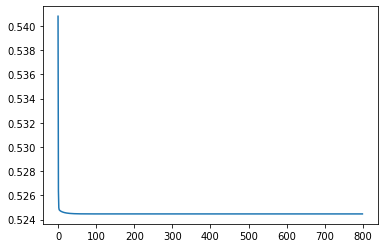

In [57]:
import matplotlib.pyplot as plt

plt.plot(error_list)

so it is clear from above model that gradient descent is working properly. Error is getting flattened.

CHECK OUTPUT OF ABOVE DEVELOPED MODEL

In [58]:
def r2_score(X,Y,weights):
  Y_hat=predict(X,weights)
  numerator=np.sum((Y-Y_hat)**2)
  denominator= np.sum((Y-Y.mean())**2)
  return (1-numerator/denominator)

In [59]:
r2_score(X,Y,weights)

-25.38096919408987

In [60]:
adj_r2=1-(1-r2_score(X,Y,weights))*(len(Y)-1)/(len(Y)-X.shape[1]-2)
print(adj_r2)

-25.702035756289746


In [61]:
Y_hat=predict(X,weights)
errs=Y_hat-Y

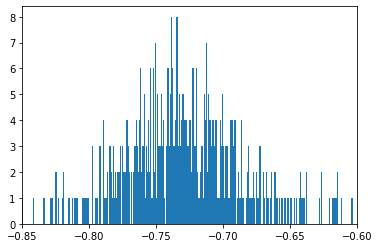

In [62]:
plt.hist(errs,bins=500)
plt.xlim(-0.85,-0.6)
plt.show()

#Multiple linear regression with sklearn

In [63]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)

In [64]:
reg.coef_

array([[0.02131721, 0.0183328 , 0.01786203, 0.07430533, 0.01249151]])

In [65]:
weights

array([[0.02131721],
       [0.0183328 ],
       [0.01786203],
       [0.07430533],
       [0.01249151]])

we can observe that both sklearn and code we implemented gave us same output. 

In [66]:
reg.score(X,Y)

0.8206600544799474

#polynomial Regression

In [67]:
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

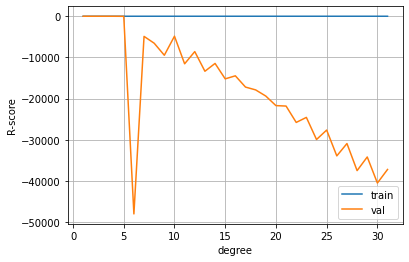

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
max_degree = 32 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    val_score = polyreg_scaled.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, 32)), train_scores, label="train")
plt.plot(list(range(1, 32)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.grid()
plt.show()

it is evident from above graph that R-score for Validation goes down after 5 degrees. so we will develop model for degree=5

RIDGE REGRESSION USING SKLEARN

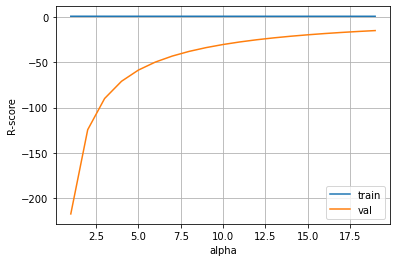

In [69]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for alpha in range(1,20):
  polyreg_scaled = make_pipeline(PolynomialFeatures(32), scaler, Ridge(alpha))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  val_score = polyreg_scaled.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(range(1, 20)), train_scores, label="train")
plt.plot(list(range(1, 20)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("alpha")
plt.ylabel("R-score")
plt.grid()
plt.show()


#alpha in this code is basically lambda

In [70]:
#Train the best model at alpha=4
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
polyreg_scaled = make_pipeline(PolynomialFeatures(32), scaler, Ridge(4))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
print(train_score)
val_score = polyreg_scaled.score(X_val, y_val)
print(val_score)

0.9191071803201591
-70.97287935942758


**Lasso Regression**

In [71]:
from sklearn.linear_model import Lasso
train_scores = []
val_scores = []
scaler = StandardScaler()
for alpha in range(1,20):
  regressor=Lasso(alpha)
  regressor.fit(X_train,y_train)
  train_score = regressor.score(X_train, y_train)
  val_score = regressor.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)
print(val_scores)

[-0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218, -0.00013779196214325218]


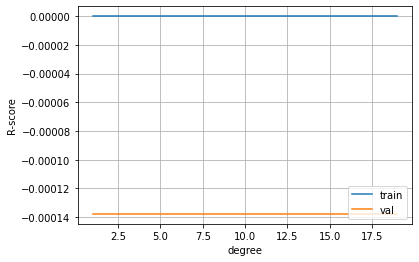

In [72]:
plt.figure()
plt.plot(list(range(1, 20)), train_scores, label="train")
plt.plot(list(range(1, 20)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.grid()
plt.show()

In [73]:
train_scores

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In Linear Regression, we try out all the models and the model with best adjusted r-squared is the best model for our use. 

Types of model may be-

1) Simple linear regression 

used when we have only one independent variable. We need to find weight in this model.

2)Multiple linear regression

used when we have more than one independent variable.We need to find weight in this model.

3)Polynimial Variable

Along with weight we also need to know the accurate powers of Independent variables in order to design the variables.

4) Ridge & Lasso

here we need hyperparameter tuning to find Accurate Lambda(it is called alpha in sklearn models). just like all models we need to find weights here too. Model here may be linear as well as Polynomial.


After designing all the models. the model with best Adjusted r-squared score is finalised and goes to production
